In [5]:
%load_ext autoreload
%autoreload 2

import cnp.util
import cnp.graph
import cnp.points

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


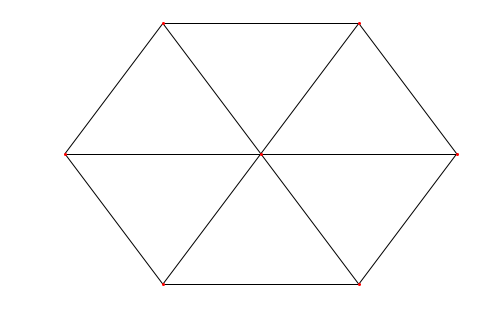

In [6]:
# Create simple set of points.
H = cnp.points.makeH()

# Make unit-length graph from points & display
G = cnp.graph.Graph(H)
G.show()

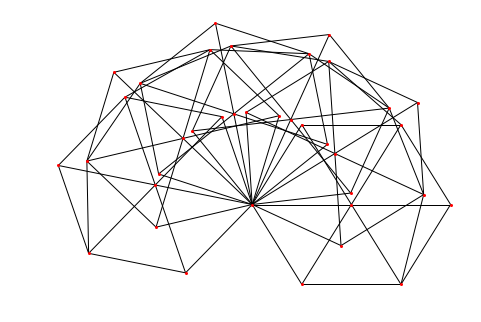

In [7]:
import sympy as sp
from sympy import S, I

for i in range(5):
    # Create a copy of H, rotated about (-1,0) slightly.
    Hr = cnp.points.rotated(H, offset=(-1 + 0*I), angle=2*sp.asin(1/sp.sqrt(12)))
    # And add it to our previous H
    H = cnp.points.add(H, Hr)

# Create unit length graph and draw
G = cnp.graph.Graph(H)
G.show()

37
Is colourable in 2 colours? False
Is colourable in 3 colours? False
Is colourable in 4 colours? True
Is colourable in 5 colours? True
Removing 30 nodes. 7 left.


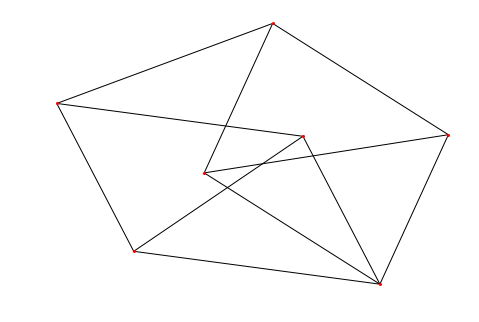

In [8]:
print(len(H[0]))

# See if this graph is n-colourable
import cnp.sat
from cnp.sat import isColourable, genMinGraph, optimize

for i in range(2,6):
    print("Is colourable in", i, "colours?", isColourable(G, i))

# Find minimal subgraph that's still not 3 colourable
optimize(G, 3, extract_MUS=True)

G.show()

31


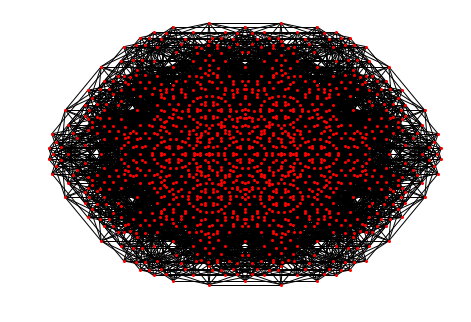

1345


In [10]:
# Now for a more complicated example... Showing M can never have a tricolour
# central H
Mp = cnp.points.makeM()
M = cnp.graph.Graph(Mp)
M.show()
print(len(Mp[0]))

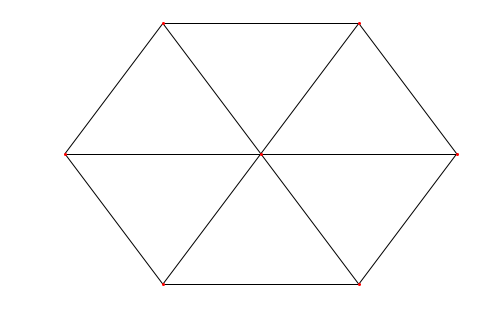

[0, 1, 1/2 + sqrt(3)*I/2, -1/2 + sqrt(3)*I/2, -1, (1 + sqrt(3)*I)**4/16, 1/2 - sqrt(3)*I/2]


In [12]:
import networkx as nx

# Check the center hexagon, which makes up the first 7 nodes of M
H = cnp.graph.Graph((Mp[0][:7], Mp[1][:7]))
H.show()
print(Mp[0][:7])

In [14]:
#from cnp.sat import sameColourConstraint

# Create a new constraint, vertices 1, 3, and 5 must never all be the same colour.
tri_nodes = [1, 3, 5]
clauses = cnp.sat.sameColourConstraint(tri_nodes, num_colours=4)

no_constr = cnp.sat.isColourable(M, num_colours=4)
print("Colourable without constraints?", no_constr)
constr = cnp.sat.isColourable(M, num_colours=4, extra_clauses=clauses)
print("Colourable with constraints?   ", constr)

Colourable without constraints? True
Colourable with constraints?    False


Removing 314 nodes. 1034 left.


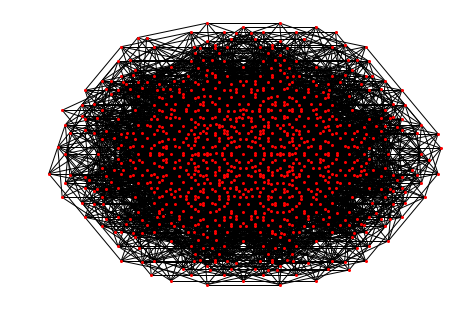

In [15]:
# Perform simple (i.e. fast) optimisation that maintains this constraint.

# Here, we pass required clauses we don't want to ignore, while we remove
# the other constraints to find smaller graphs.

node_count = len(M.G.nodes)
cnp.sat.optimize(M, num_colours=4, extract_MUS=False, required_cl=clauses, required_nodes=tri_nodes)
diff = node_count - len(M.G.nodes)

M.show()

In [16]:
# Check it still works
constr = cnp.sat.isColourable(M, num_colours=4, extra_clauses=clauses)
print("Colourable with constraints?   ", constr)

Colourable with constraints?    False


In [17]:
# Completely optimize - remove until we reach a point where removing any clause causes the resulting
# graph to be sat once again.

# Again we pass required nodes and clauses so we don't simply delete the important central H graph.
cnp.sat.optimize(M, num_colours=4, extract_MUS=True, required_cl=clauses,
                 required_nodes=tri_nodes, verbosity=2)

Created formula
Core extraction

c testing node: 1344 -> unsat (removing 1344)
c testing node: 1343 -> unsat (removing 1343)
c testing node: 1342 -> unsat (removing 1342)
c testing node: 1341 -> unsat (removing 1341)
c testing node: 1340 -> unsat (removing 1340)
c testing node: 1339 -> unsat (removing 1339)
c testing node: 1338 -> unsat (removing 1338)
c testing node: 1337 -> unsat (removing 1337)
c testing node: 1336 -> unsat (removing 1336)
c testing node: 1335 -> unsat (removing 1335)
c testing node: 1334 -> unsat (removing 1334)
c testing node: 1333 -> unsat (removing 1333)
c testing node: 1332 -> unsat (removing 1332)
c testing node: 1331 -> unsat (removing 1331)
c testing node: 1330 -> unsat (removing 1330)
c testing node: 1329 -> unsat (removing 1329)
c testing node: 1328 -> unsat (removing 1328)
c testing node: 1327 -> unsat (removing 1327)
c testing node: 1326 -> unsat (removing 1326)
c testing node: 1325 -> unsat (removing 1325)
c testing node: 1324 -> unsat (removing 1324)
c

c testing node: 1101 -> unsat (removing 1101)
c testing node: 1100 -> unsat (removing 1100)
c testing node: 1097 -> unsat (removing 1097)
c testing node: 1096 -> unsat (removing 1096)
c testing node: 1095 -> unsat (removing 1095)
c testing node: 1075 -> sat (keeping 1075)
c testing node: 1074 -> unsat (removing 1074)
c testing node: 1065 -> unsat (removing 1065)
c testing node: 1062 -> unsat (removing 1062)
c testing node: 1061 -> unsat (removing 1061)
c testing node: 1060 -> unsat (removing 1060)
c testing node: 1059 -> unsat (removing 1059)
c testing node: 1057 -> unsat (removing 1057)
c testing node: 1054 -> unsat (removing 1054)
c testing node: 1053 -> unsat (removing 1053)
c testing node: 1052 -> sat (keeping 1052)
c testing node: 1051 -> unsat (removing 1051)
c testing node: 1050 -> unsat (removing 1050)
c testing node: 1049 -> unsat (removing 1049)
c testing node: 1048 -> sat (keeping 1048)
c testing node: 1047 -> sat (keeping 1047)
c testing node: 1046 -> unsat (removing 1046)


c testing node: 782 -> sat (keeping 782)
c testing node: 781 -> sat (keeping 781)
c testing node: 780 -> unsat (removing 780)
c testing node: 778 -> unsat (removing 778)
c testing node: 777 -> unsat (removing 777)
c testing node: 776 -> unsat (removing 776)
c testing node: 775 -> unsat (removing 775)
c testing node: 774 -> sat (keeping 774)
c testing node: 773 -> sat (keeping 773)
c testing node: 772 -> unsat (removing 772)
c testing node: 771 -> unsat (removing 771)
c testing node: 769 -> unsat (removing 769)
c testing node: 768 -> unsat (removing 768)
c testing node: 767 -> unsat (removing 767)
c testing node: 766 -> unsat (removing 766)
c testing node: 765 -> unsat (removing 765)
c testing node: 763 -> unsat (removing 763)
c testing node: 762 -> unsat (removing 762)
c testing node: 761 -> sat (keeping 761)
c testing node: 760 -> unsat (removing 760)
c testing node: 758 -> unsat (removing 758)
c testing node: 757 -> unsat (removing 757)
c testing node: 756 -> unsat (removing 756)
c t

c testing node: 448 -> unsat (removing 448)
c testing node: 447 -> unsat (removing 447)
c testing node: 446 -> unsat (removing 446)
c testing node: 445 -> sat (keeping 445)
c testing node: 443 -> unsat (removing 443)
c testing node: 442 -> sat (keeping 442)
c testing node: 440 -> unsat (removing 440)
c testing node: 439 -> sat (keeping 439)
c testing node: 438 -> unsat (removing 438)
c testing node: 437 -> unsat (removing 437)
c testing node: 436 -> unsat (removing 436)
c testing node: 433 -> unsat (removing 433)
c testing node: 432 -> unsat (removing 432)
c testing node: 431 -> sat (keeping 431)
c testing node: 430 -> sat (keeping 430)
c testing node: 429 -> sat (keeping 429)
c testing node: 426 -> unsat (removing 426)
c testing node: 425 -> unsat (removing 425)
c testing node: 424 -> unsat (removing 424)
c testing node: 423 -> sat (keeping 423)
c testing node: 421 -> sat (keeping 421)
c testing node: 420 -> sat (keeping 420)
c testing node: 419 -> unsat (removing 419)
c testing node:

c testing node: 155 -> sat (keeping 155)
c testing node: 154 -> sat (keeping 154)
c testing node: 153 -> sat (keeping 153)
c testing node: 152 -> unsat (removing 152)
c testing node: 151 -> unsat (removing 151)
c testing node: 150 -> sat (keeping 150)
c testing node: 149 -> sat (keeping 149)
c testing node: 148 -> sat (keeping 148)
c testing node: 147 -> unsat (removing 147)
c testing node: 145 -> sat (keeping 145)
c testing node: 144 -> sat (keeping 144)
c testing node: 143 -> sat (keeping 143)
c testing node: 142 -> sat (keeping 142)
c testing node: 141 -> sat (keeping 141)
c testing node: 140 -> sat (keeping 140)
c testing node: 139 -> unsat (removing 139)
c testing node: 138 -> unsat (removing 138)
c testing node: 137 -> sat (keeping 137)
c testing node: 136 -> sat (keeping 136)
c testing node: 135 -> sat (keeping 135)
c testing node: 134 -> sat (keeping 134)
c testing node: 133 -> unsat (removing 133)
c testing node: 132 -> unsat (removing 132)
c testing node: 129 -> unsat (removi

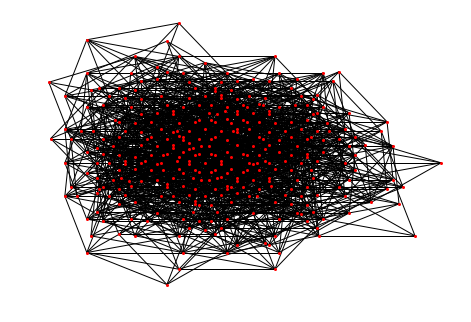

Checking: 1602 edges.


True

In [18]:
# Double check it's exactly unit length
#nx.write_gpickle(M, "G-333.gpickle")
M.show()
M.checkNetXGraph()

In [ ]:
# :D